In [55]:
import pandas as pd
import os

op_settings = ['op_setting_1', 'op_setting_2', 'op_setting_3']
sensors = [f'sensor_{i}' for i in range(1, 22)]
cols = ['unit_number', 'time_in_cycles'] + op_settings + sensors

data_path = 'data/'

train_data = {}
test_data = {}
rul_data = {}

datasets_to_load = ['FD001', 'FD002', 'FD003', 'FD004']

print("Loading datasets...")

for ds_name in datasets_to_load:
    train_file = os.path.join(data_path, f'train_{ds_name}.txt')
    train_df = pd.read_csv(train_file, sep=' ', header=None, names=cols, index_col=False)
    train_df.drop(columns=[26, 27], inplace=True, errors='ignore')
    train_data[ds_name] = train_df

    test_file = os.path.join(data_path, f'test_{ds_name}.txt')
    test_df = pd.read_csv(test_file, sep=' ', header=None, names=cols, index_col=False)
    test_df.drop(columns=[26, 27], inplace=True, errors='ignore')
    test_data[ds_name] = test_df

    rul_file = os.path.join(data_path, f'RUL_{ds_name}.txt')
    rul_df = pd.read_csv(rul_file, header=None, names=['RUL'], index_col=False)
    rul_data[ds_name] = rul_df

print("All datasets loaded successfully.")

print("\n--- Example: Head of train_FD001 ---")
print(train_data['FD001'].head())

print("\n--- Example: Head of test_FD001 ---")
print(test_data['FD001'].head())

print("\n--- Example: Head of RUL_FD001 ---")
print(rul_data['FD001'].head())

Loading datasets...


/var/folders/hp/0xysbm9s7v94tp381zp1_djm0000gn/T/ipykernel_8400/1612479227.py:20: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  train_df = pd.read_csv(train_file, sep=' ', header=None, names=cols, index_col=False)
/var/folders/hp/0xysbm9s7v94tp381zp1_djm0000gn/T/ipykernel_8400/1612479227.py:25: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  test_df = pd.read_csv(test_file, sep=' ', header=None, names=cols, index_col=False)
/var/folders/hp/0xysbm9s7v94tp381zp1_djm0000gn/T/ipykernel_8400/1612479227.py:20: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  train_df = pd.read_csv(train_file, sep=' ', header=None, names=cols, index_col=False)
/var/folders/hp/0xysbm9s7v94tp381zp1_djm0000gn/T/ipykernel_8400/1612479227.py:25: ParserWarning: Length of header or names 

All datasets loaded successfully.

--- Example: Head of train_FD001 ---
   unit_number  time_in_cycles  op_setting_1  op_setting_2  op_setting_3  \
0            1               1       -0.0007       -0.0004         100.0   
1            1               2        0.0019       -0.0003         100.0   
2            1               3       -0.0043        0.0003         100.0   
3            1               4        0.0007        0.0000         100.0   
4            1               5       -0.0019       -0.0002         100.0   

   sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  ...  sensor_12  \
0    518.67    641.82   1589.70   1400.60     14.62  ...     521.66   
1    518.67    642.15   1591.82   1403.14     14.62  ...     522.28   
2    518.67    642.35   1587.99   1404.20     14.62  ...     522.42   
3    518.67    642.35   1582.79   1401.87     14.62  ...     522.86   
4    518.67    642.37   1582.85   1406.22     14.62  ...     522.19   

   sensor_13  sensor_14  sensor_15  sensor_1

In [54]:
import pandas as pd
import numpy as np

try:
    processed_dfs = {}
    static_cols_map = {}
    scalers_map = {}
    all_sequence_data = {}

    WINDOW_SIZE = 30

    print("--- Executing Preprocessing Pipeline for All Datasets ---")

    for name, df in all_train_dfs.items():
        print(f"\nProcessing {name}...")

        df_rul = calculate_rul(df)

        df_no_static, static_cols = remove_static_cols(df_rul)
        static_cols_map[name] = static_cols

        df_normalized, scaler = normalize_features(df_no_static)
        scalers_map[name] = scaler

        X_train, y_train = generate_sequences(df_normalized, WINDOW_SIZE)
        all_sequence_data[name] = {'X': X_train, 'y': y_train}

        print(f" {name} processing complete.")

    print("\n\n---  Pipeline Finished ---")
    print("Final sequence data is stored in 'all_sequence_data'.")
    print("Artifacts for test set processing are stored in 'static_cols_map' and 'scalers_map'.")

    print("\n--- Summary of Generated Data Shapes ---")
    for name, data in all_sequence_data.items():
        print(f"Dataset {name}: X_train shape={data['X'].shape}, y_train shape={data['y'].shape}")

except NameError as e:
    print(f"Error: A required variable or function is not defined: {e}")
    print("Please ensure 'all_train_dfs' and all helper functions (calculate_rul, remove_static_cols, normalize_features, generate_sequences) are defined first.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Executing Preprocessing Pipeline for All Datasets ---

Processing FD001...
 FD001 processing complete.

Processing FD002...
 FD002 processing complete.

Processing FD003...
 FD003 processing complete.

Processing FD004...
 FD004 processing complete.


---  Pipeline Finished ---
Final sequence data is stored in 'all_sequence_data'.
Artifacts for test set processing are stored in 'static_cols_map' and 'scalers_map'.

--- Summary of Generated Data Shapes ---
Dataset FD001: X_train shape=(17731, 30, 19), y_train shape=(17731,)
Dataset FD002: X_train shape=(46219, 30, 24), y_train shape=(46219,)
Dataset FD003: X_train shape=(21820, 30, 20), y_train shape=(21820,)
Dataset FD004: X_train shape=(54028, 30, 24), y_train shape=(54028,)


In [16]:
pip install liquidnet

Defaulting to user installation because normal site-packages is not writeable
  Using cached liquidnet-0.0.5-py3-none-any.whl (7.1 kB)
  Using cached einops-0.8.1-py3-none-any.whl (64 kB)
  Using cached torch-2.8.0-cp39-none-macosx_11_0_arm64.whl (73.6 MB)
  Using cached jinja2-3.1.6-py3-none-any.whl (134 kB)
     |████████████████████████████████| 6.3 MB 563 kB/s eta 0:00:01
  Using cached filelock-3.19.1-py3-none-any.whl (15 kB)
     |████████████████████████████████| 200 kB 809 kB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 536 kB 1.4 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [23]:
import torch
import torch.nn as nn
import numpy as np
from liquidnet.main import ODESolver, MappingType

class LiquidNet(nn.Module):
    def __init__(self, num_units):
        super(LiquidNet, self).__init__()
        self._input_size = -1
        self._num_units = num_units
        self._is_built = False
        self._ode_solver_unfolds = 6
        self._solver = ODESolver.SemiImplicit
        self._input_mapping = MappingType.Affine
        self._w_init_max = 1.0
        self._w_init_min = 0.01

    @property
    def state_size(self):
        return self._num_units

    def _map_inputs(self, inputs):
        if (self._input_mapping == MappingType.Affine or self._input_mapping == MappingType.Linear):
            w = nn.Parameter(torch.ones(self._input_size, device=inputs.device), requires_grad=False)
            inputs = inputs * w
        if self._input_mapping == MappingType.Affine:
            b = nn.Parameter(torch.zeros(self._input_size, device=inputs.device), requires_grad=False)
            inputs = inputs + b
        return inputs

    def forward(self, inputs, state):
        if not self._is_built:
            self._is_built = True
            self._input_size = int(inputs.shape[-1])
            self._get_variables()
            self._to_device(inputs.device)

        inputs = self._map_inputs(inputs)

        next_state = self._ode_step(inputs, state)

        return next_state, next_state

    def _to_device(self, device):
        self.sensory_mu.data = self.sensory_mu.data.to(device)
        self.sensory_sigma.data = self.sensory_sigma.data.to(device)
        self.sensory_W.data = self.sensory_W.data.to(device)
        self.sensory_erev.data = self.sensory_erev.data.to(device)
        self.mu.data = self.mu.data.to(device)
        self.sigma.data = self.sigma.data.to(device)
        self.W.data = self.W.data.to(device)
        self.erev.data = self.erev.data.to(device)
        self.vleak.data = self.vleak.data.to(device)
        self.gleak.data = self.gleak.data.to(device)
        self.cm_t.data = self.cm_t.data.to(device)

    def _get_variables(self):
        self.sensory_mu = nn.Parameter(torch.rand(self._input_size, self._num_units) * 0.5 + 0.3)
        self.sensory_sigma = nn.Parameter(torch.rand(self._input_size, self._num_units) * 5.0 + 3.0)
        self.sensory_W = nn.Parameter(torch.Tensor(np.random.uniform(low=self._w_init_min, high=self._w_init_max, size=[self._input_size, self._num_units])))
        self.sensory_erev = nn.Parameter(torch.Tensor(2 * np.random.randint(low=0, high=2, size=[self._input_size, self._num_units]) - 1))
        self.mu = nn.Parameter(torch.rand(self._num_units, self._num_units) * 0.5 + 0.3)
        self.sigma = nn.Parameter(torch.rand(self._num_units, self._num_units) * 5.0 + 3.0)
        self.W = nn.Parameter(torch.Tensor(np.random.uniform(low=self._w_init_min, high=self._w_init_max, size=[self._num_units, self._num_units])))
        self.erev = nn.Parameter(torch.Tensor(2 * np.random.randint(low=0, high=2, size=[self._num_units, self._num_units]) - 1))
        self.vleak = nn.Parameter(torch.rand(self._num_units) * 0.4 - 0.2)
        self.gleak = nn.Parameter(torch.ones(self._num_units))
        self.cm_t = nn.Parameter(torch.ones(self._num_units) * 0.5)

    def _ode_step(self, inputs, state):
        v_pre = state
        sensory_w_activation = self.sensory_W * self._sigmoid(inputs, self.sensory_mu, self.sensory_sigma)
        sensory_rev_activation = sensory_w_activation * self.sensory_erev
        w_numerator_sensory = torch.sum(sensory_rev_activation, dim=1)
        w_denominator_sensory = torch.sum(sensory_w_activation, dim=1)
        for _ in range(self._ode_solver_unfolds):
            w_activation = self.W * self._sigmoid(v_pre, self.mu, self.sigma)
            rev_activation = w_activation * self.erev
            w_numerator = torch.sum(rev_activation, dim=1) + w_numerator_sensory
            w_denominator = torch.sum(w_activation, dim=1) + w_denominator_sensory
            numerator = self.cm_t * v_pre + self.gleak * self.vleak + w_numerator
            denominator = self.cm_t + self.gleak + w_denominator
            v_pre = numerator / denominator
        return v_pre

    def _sigmoid(self, v_pre, mu, sigma):
        v_pre = v_pre.unsqueeze(-1)
        mues = v_pre - mu
        x = sigma * mues
        return torch.sigmoid(x)

print(" Corrected LiquidNet class has been defined.")

 Corrected LiquidNet class has been defined.


In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, random_split
import numpy as np

try:
    DATASET_TO_TRAIN = 'FD001'
    DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    EPOCHS = 50
    BATCH_SIZE = 64
    LEARNING_RATE = 0.001
    VALIDATION_SPLIT = 0.2
    PATIENCE = 5

    if 'all_sequence_data' not in locals() or 'all_models' not in locals():
        print("Error: 'all_sequence_data' or 'all_models' not defined. Please run previous cells.")
    elif DATASET_TO_TRAIN not in all_sequence_data or DATASET_TO_TRAIN not in all_models:
        print(f"Error: Dataset key '{DATASET_TO_TRAIN}' not found in the data or model dictionaries.")
    else:
        print(f"---  Starting Training for {DATASET_TO_TRAIN} on device: {DEVICE} ---")

        X_train_np = all_sequence_data[DATASET_TO_TRAIN]['X']
        y_train_np = all_sequence_data[DATASET_TO_TRAIN]['y']

        X_tensor = torch.from_numpy(X_train_np).float()
        y_tensor = torch.from_numpy(y_train_np).float().view(-1, 1)

        dataset = TensorDataset(X_tensor, y_tensor)

        val_size = int(len(dataset) * VALIDATION_SPLIT)
        train_size = len(dataset) - val_size
        train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

        train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

        model = all_models[DATASET_TO_TRAIN].to(DEVICE)
        loss_function = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

        best_val_loss = float('inf')
        patience_counter = 0
        history = {'train_loss': [], 'val_loss': []}

        for epoch in range(EPOCHS):
            model.train()
            total_train_loss = 0
            for inputs, labels in train_loader:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = loss_function(outputs, labels)
                loss.backward()
                optimizer.step()
                total_train_loss += loss.item()
            
            avg_train_loss = total_train_loss / len(train_loader)
            history['train_loss'].append(avg_train_loss)

            model.eval()
            total_val_loss = 0
            with torch.no_grad():
                for inputs, labels in val_loader:
                    inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                    outputs = model(inputs)
                    loss = loss_function(outputs, labels)
                    total_val_loss += loss.item()

            avg_val_loss = total_val_loss / len(val_loader)
            history['val_loss'].append(avg_val_loss)
            
            print(f"Epoch {epoch+1:03d}/{EPOCHS:03d} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

            if avg_val_loss < best_val_loss:
                best_val_loss = avg_val_loss
                torch.save(model.state_dict(), f'best_model_{DATASET_TO_TRAIN}.pth')
                patience_counter = 0
                print(f"  -> Val loss improved. Saving model to 'best_model_{DATASET_TO_TRAIN}.pth'")
            else:
                patience_counter += 1
                if patience_counter >= PATIENCE:
                    print(f"---  Early stopping triggered after {PATIENCE} epochs of no improvement ---")
                    break
        
        print("\n--- Training Finished ---")

except NameError as e:
    print(f"Error: A required variable or function is not defined: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

---  Starting Training for FD001 on device: cpu ---
Epoch 001/050 | Train Loss: 10390.2919 | Val Loss: 5205.4454
  -> Val loss improved. Saving model to 'best_model_FD001.pth'
Epoch 002/050 | Train Loss: 3801.4267 | Val Loss: 1483.4727
  -> Val loss improved. Saving model to 'best_model_FD001.pth'
Epoch 003/050 | Train Loss: 1711.7734 | Val Loss: 1380.7491
  -> Val loss improved. Saving model to 'best_model_FD001.pth'
Epoch 004/050 | Train Loss: 1500.8758 | Val Loss: 1398.3358
Epoch 005/050 | Train Loss: 1441.3635 | Val Loss: 1361.7532
  -> Val loss improved. Saving model to 'best_model_FD001.pth'
Epoch 006/050 | Train Loss: 1429.3857 | Val Loss: 1334.3817
  -> Val loss improved. Saving model to 'best_model_FD001.pth'
Epoch 007/050 | Train Loss: 1392.0304 | Val Loss: 1353.7731
Epoch 008/050 | Train Loss: 1377.1199 | Val Loss: 1313.8942
  -> Val loss improved. Saving model to 'best_model_FD001.pth'
Epoch 009/050 | Train Loss: 1376.8397 | Val Loss: 1361.1200
Epoch 010/050 | Train Loss: 1

In [29]:
import pandas as pd
import os

try:
    DATASET_TO_PROCESS = 'FD001'
    data_path = 'data/'
    test_file_name = f'test_{DATASET_TO_PROCESS}.txt'
    test_file_path = os.path.join(data_path, test_file_name)

    column_names = ['engine_id', 'cycle'] + [f'op_setting_{i}' for i in range(1, 4)] + [f'sensor_{i}' for i in range(1, 22)]
    
    df_test_raw = pd.read_csv(test_file_path, sep='\\s+', header=None, names=column_names)

    static_cols = static_cols_map[DATASET_TO_PROCESS]
    scaler = scalers_map[DATASET_TO_PROCESS]

    print(f"\n--- Processing {test_file_name} ---")

    df_test_processed = df_test_raw.drop(columns=static_cols)
    print(f"Removed static columns: {static_cols}")

    feature_cols = [col for col in df_test_processed.columns if col not in ['engine_id', 'cycle']]
    df_test_processed[feature_cols] = scaler.transform(df_test_processed[feature_cols])
    print("Applied normalization using the scaler from the training data.")

    print("\n--- Verification ---")
    print("Displaying the head of the preprocessed test data:")
    display(df_test_processed.head())

except NameError:
    print("Error: Please ensure 'static_cols_map' and 'scalers_map' are defined from the training pipeline.")
except FileNotFoundError:
    print(f"Error: {test_file_path} not found. Please make sure it is in the '{data_path}' folder.")
except KeyError:
    print(f"Error: Key '{DATASET_TO_PROCESS}' not found. Did the training pipeline run correctly?")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


--- Processing test_FD001.txt ---
Removed static columns: ['op_setting_3', 'sensor_1', 'sensor_10', 'sensor_18', 'sensor_19']
Applied normalization using the scaler from the training data.

--- Verification ---
Displaying the head of the preprocessed test data:


,engine_id,cycle,op_setting_1,op_setting_2,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,...,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_20,sensor_21
0,1,1,0.632184,0.750000,0.545181,0.310661,0.269413,0.0,1.0,0.652174,...,0.127614,0.208333,0.646055,0.220588,0.132160,0.308965,0.0,0.333333,0.558140,0.661834
1,1,2,0.344828,0.250000,0.150602,0.379551,0.222316,0.0,1.0,0.805153,...,0.146684,0.386905,0.739872,0.264706,0.204768,0.213159,0.0,0.416667,0.682171,0.686827
2,1,3,0.517241,0.583333,0.376506,0.346632,0.322248,0.0,1.0,0.685990,...,0.158081,0.386905,0.699360,0.220588,0.155640,0.458638,0.0,0.416667,0.728682,0.721348
3,1,4,0.741379,0.500000,0.370482,0.285154,0.408001,0.0,1.0,0.679549,...,0.105717,0.255952,0.573561,0.250000,0.170090,0.257022,0.0,0.250000,0.666667,0.662110
4,1,5,0.580460,0.500000,0.391566,0.352082,0.332039,0.0,1.0,0.694042,...,0.102396,0.273810,0.737740,0.220588,0.152751,0.300885,0.0,0.166667,0.658915,0.716377


To predict the final RUL for each test engine, you only need its last available sequence of data. For each engine in the test set, take the last

In [30]:
import numpy as np
import torch

try:
    if 'df_test_processed' not in locals():
        print("Error: 'df_test_processed' not defined. Please run the preprocessing step first.")
    else:
        WINDOW_SIZE = 30
        DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        feature_cols = [col for col in df_test_processed.columns if col not in ['engine_id', 'cycle']]
        num_features = len(feature_cols)

        test_sequences = []
        engine_ids = df_test_processed['engine_id'].unique()

        print(f"--- Generating final test sequences for {len(engine_ids)} engines ---")

        for engine_id in engine_ids:
            engine_df = df_test_processed[df_test_processed['engine_id'] == engine_id]
            feature_data = engine_df[feature_cols].tail(WINDOW_SIZE).values

            if feature_data.shape[0] < WINDOW_SIZE:
                padding = np.zeros((WINDOW_SIZE - feature_data.shape[0], num_features))
                feature_data = np.concatenate((padding, feature_data), axis=0)

            test_sequences.append(feature_data)

        X_test = torch.from_numpy(np.array(test_sequences)).float().to(DEVICE)

        print(" Final test sequences created successfully.")
        print(f"Tensor is on device: {X_test.device}")
        print(f"Shape of X_test: {X_test.shape}")
        print(f"(Number of Engines, Window Size, Number of Features)")

except NameError:
    print("Error: 'df_test_processed' not defined. Please run the preprocessing step first.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Generating final test sequences for 100 engines ---
 Final test sequences created successfully.
Tensor is on device: cpu
Shape of X_test: torch.Size([100, 30, 19])
(Number of Engines, Window Size, Number of Features)


In [31]:
import torch
import numpy as np

try:
    DATASET_TO_EVALUATE = 'FD001'
    DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    if 'all_models' not in locals() or 'X_test' not in locals():
        print("Error: Ensure 'all_models' and 'X_test' are defined from the previous steps.")
    else:
        model_file = f'best_model_{DATASET_TO_EVALUATE}.pth'
        model = all_models[DATASET_TO_EVALUATE].to(DEVICE)
        model.load_state_dict(torch.load(model_file))

        model.eval()

        with torch.no_grad():
            rul_predictions_tensor = model(X_test)

        rul_predictions = rul_predictions_tensor.cpu().numpy().flatten()

        print(f" Predictions generated successfully for {DATASET_TO_EVALUATE}.")
        print("\n--- First 15 RUL Predictions ---")
        for i, prediction in enumerate(rul_predictions[:15]):
            print(f"Engine {i+1:03d}: Predicted RUL = {prediction:.2f} cycles")

except NameError:
    print("Error: Ensure 'all_models' and 'X_test' are defined from the previous steps.")
except FileNotFoundError:
    print(f"Error: Saved model '{model_file}' not found. Please train the model first.")
except KeyError:
    print(f"Error: Model key '{DATASET_TO_EVALUATE}' not found in 'all_models'.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

 Predictions generated successfully for FD001.

--- First 15 RUL Predictions ---
Engine 001: Predicted RUL = 145.59 cycles
Engine 002: Predicted RUL = 132.71 cycles
Engine 003: Predicted RUL = 72.26 cycles
Engine 004: Predicted RUL = 106.56 cycles
Engine 005: Predicted RUL = 114.15 cycles
Engine 006: Predicted RUL = 123.48 cycles
Engine 007: Predicted RUL = 122.21 cycles
Engine 008: Predicted RUL = 109.68 cycles
Engine 009: Predicted RUL = 124.43 cycles
Engine 010: Predicted RUL = 114.59 cycles
Engine 011: Predicted RUL = 97.09 cycles
Engine 012: Predicted RUL = 102.73 cycles
Engine 013: Predicted RUL = 104.65 cycles
Engine 014: Predicted RUL = 112.88 cycles
Engine 015: Predicted RUL = 145.60 cycles


In [32]:
import numpy as np
from sklearn.metrics import mean_squared_error
import os

def calculate_cmapss_score(y_true, y_pred):
    d = y_pred - y_true
    scores = np.where(d < 0, np.exp(-d / 13.0) - 1, np.exp(d / 10.0) - 1)
    return np.sum(scores)

try:
    DATASET_TO_EVALUATE = 'FD001'
    data_path = 'data/'
    rul_file_name = f'RUL_{DATASET_TO_EVALUATE}.txt'
    rul_file_path = os.path.join(data_path, rul_file_name)

    rul_true = np.loadtxt(rul_file_path)

    rmse = np.sqrt(mean_squared_error(rul_true, rul_predictions))
    cmapss_score = calculate_cmapss_score(rul_true, rul_predictions)

    print(f"\n--- Final Performance for {DATASET_TO_EVALUATE} ---")
    print(f" Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f" Asymmetric C-MAPSS Score:   {cmapss_score:.2f}")

except NameError:
    print("\nError: 'rul_predictions' is not defined. Please run the prediction cell first.")
except FileNotFoundError:
    print(f"\nError: '{rul_file_path}' not found. Please make sure it is in the '{data_path}' folder.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


--- Final Performance for FD001 ---
 Root Mean Squared Error (RMSE): 26.17
 Asymmetric C-MAPSS Score:   7031.54


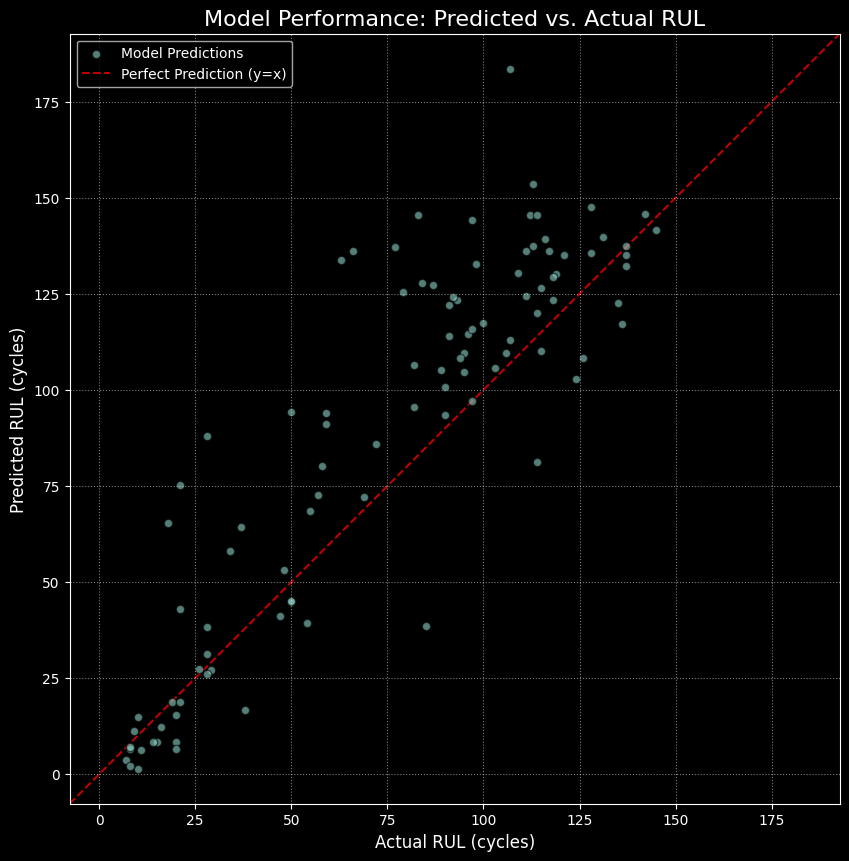

In [33]:
import matplotlib.pyplot as plt
import numpy as np

try:
    plt.style.use('dark_background')
    fig, ax = plt.subplots(figsize=(10, 10))

    ax.scatter(rul_true, rul_predictions, alpha=0.6, edgecolors='k', label='Model Predictions')

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'r--', alpha=0.75, zorder=0, label='Perfect Prediction (y=x)')

    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(lims)
    ax.set_ylim(lims)

    ax.set_title('Model Performance: Predicted vs. Actual RUL', fontsize=16)
    ax.set_xlabel('Actual RUL (cycles)', fontsize=12)
    ax.set_ylabel('Predicted RUL (cycles)', fontsize=12)
    ax.legend()
    ax.grid(True, linestyle=':', alpha=0.5)

    plt.show()

except NameError:
    print("Error: 'rul_true' or 'rul_predictions' not defined. Please run the previous cells first.")
except Exception as e:
    print(f"An error occurred during plotting: {e}")

In [34]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def calculate_cmapss_score(y_true, y_pred):
    d = y_pred - y_true
    scores = np.where(d < 0, np.exp(-d / 13.0) - 1, np.exp(d / 10.0) - 1)
    return np.sum(scores)

try:
    DATASET_TO_EVALUATE = 'FD001'

    rmse = np.sqrt(mean_squared_error(rul_true, rul_predictions))
    mae = mean_absolute_error(rul_true, rul_predictions)
    cmapss_score = calculate_cmapss_score(rul_true, rul_predictions)

    print(f"---  Regression Scores Report for {DATASET_TO_EVALUATE} ---")
    print(f"Mean Absolute Error (MAE):     {mae:.2f} cycles")
    print(f"Root Mean Squared Error (RMSE):  {rmse:.2f}")
    print(f"Asymmetric C-MAPSS Score:        {cmapss_score:.2f}")

except NameError:
    print("\nError: 'rul_true' or 'rul_predictions' is not defined. Please run the previous evaluation cells first.")

---  Regression Scores Report for FD001 ---
Mean Absolute Error (MAE):     19.12 cycles
Root Mean Squared Error (RMSE):  26.17
Asymmetric C-MAPSS Score:        7031.54


**Tuning for FD001, FD002, FD003,FD004**

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, random_split
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from liquidnet.main import LiquidNet

DATASET_TO_TRAIN = 'FD001'
WINDOW_SIZE = 40
MAX_RUL = 125
LEARNING_RATE = 0.001
BATCH_SIZE = 64
EPOCHS = 100
PATIENCE = 8
CNN_FILTERS = 48
LNN_UNITS = 150
DENSE_UNITS = 72
VALIDATION_SPLIT = 0.2

def prepare_training_data(df_raw, window_size, max_rul):
    df_train = df_raw.copy()
    df_train['RUL'] = df_train.groupby('engine_id')['cycle'].transform(max) - df_train['cycle']
    df_train['RUL'] = np.clip(df_train['RUL'], 0, max_rul)
    feature_cols = [f'op_setting_{i}' for i in range(1, 4)] + [f'sensor_{i}' for i in range(1, 22)]
    static_cols = [col for col in feature_cols if df_train[col].std() == 0]
    feature_cols = [col for col in feature_cols if col not in static_cols]
    scaler = MinMaxScaler()
    df_train[feature_cols] = scaler.fit_transform(df_train[feature_cols])
    sequences, labels = [], []
    for engine_id in df_train['engine_id'].unique():
        engine_df = df_train[df_train['engine_id'] == engine_id]
        feature_data = engine_df[feature_cols].values
        label_data = engine_df['RUL'].values
        for i in range(len(engine_df) - window_size + 1):
            sequences.append(feature_data[i:i+window_size])
            labels.append(label_data[i+window_size-1])
    return np.array(sequences), np.array(labels)

class HybridCnnLnn(nn.Module):
    def __init__(self, num_features, cnn_filters, lnn_units, dense_units):
        super(HybridCnnLnn, self).__init__()
        self.lnn_units = lnn_units
        self.cnn_feature_extractor = nn.Sequential(
            nn.Conv1d(in_channels=num_features, out_channels=cnn_filters, kernel_size=5, padding='same'),
            nn.ReLU(), nn.MaxPool1d(kernel_size=2),
            nn.Conv1d(in_channels=cnn_filters, out_channels=cnn_filters * 2, kernel_size=3, padding='same'),
            nn.ReLU(), nn.MaxPool1d(kernel_size=2), nn.Dropout(0.5))
        self.lnn_core = LiquidNet(num_units=lnn_units)
        self.output_head = nn.Sequential(
            nn.Linear(in_features=lnn_units, out_features=dense_units),
            nn.ReLU(), nn.Linear(in_features=dense_units, out_features=1))

    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = self.cnn_feature_extractor(x)
        x = x.permute(0, 2, 1)
        batch_size, seq_len = x.size(0), x.size(1)
        hidden_state = torch.zeros(batch_size, self.lnn_units).to(x.device)
        for t in range(seq_len):
            output, hidden_state = self.lnn_core(x[:, t, :], hidden_state)
        final_prediction = self.output_head(hidden_state)
        return final_prediction

print(f"---  Starting Experiment for {DATASET_TO_TRAIN} ---")
print(f"Window Size: {WINDOW_SIZE}, LR: {LEARNING_RATE}, CNN Filters: {CNN_FILTERS}, LNN Units: {LNN_UNITS}")

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Training on device: {DEVICE}")

column_names = ['engine_id', 'cycle'] + [f'op_setting_{i}' for i in range(1, 4)] + [f'sensor_{i}' for i in range(1, 22)]

data_path = 'data/'
file_path = os.path.join(data_path, f'train_{DATASET_TO_TRAIN}.txt')

try:
    df_raw = pd.read_csv(file_path, sep='\\s+', header=None, names=column_names)
    print(f"Successfully loaded {file_path}")

    X_train_np, y_train_np = prepare_training_data(df_raw, WINDOW_SIZE, MAX_RUL)
    X_tensor = torch.from_numpy(X_train_np).float()
    y_tensor = torch.from_numpy(y_train_np).float().view(-1, 1)
    dataset = TensorDataset(X_tensor, y_tensor)
    val_size = int(len(dataset) * VALIDATION_SPLIT)
    train_size = len(dataset) - val_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

    num_features = X_train_np.shape[2]
    model = HybridCnnLnn(num_features, CNN_FILTERS, LNN_UNITS, DENSE_UNITS).to(DEVICE)
    loss_function = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

    best_val_loss = float('inf')
    patience_counter = 0

    for epoch in range(EPOCHS):
        model.train()
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_function(outputs, labels)
            loss.backward()
            optimizer.step()

        model.eval()
        total_val_loss = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                loss = loss_function(outputs, labels)
                total_val_loss += loss.item()

        avg_val_loss = total_val_loss / len(val_loader)
        print(f"Epoch {epoch+1:03d}/{EPOCHS:03d} | Validation Loss: {avg_val_loss:.4f}")

        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save(model.state_dict(), f'best_tuned_model_{DATASET_TO_TRAIN}.pth')
            patience_counter = 0
            print("  -> Val loss improved. Saving model.")
        else:
            patience_counter += 1
            if patience_counter >= PATIENCE:
                print("---  Early stopping triggered ---")
                break
    print("\n--- Training Finished ---")

except FileNotFoundError:
    print(f"Error: {file_path} not found. Please ensure it is in the '{data_path}' folder.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

---  Starting Experiment for FD001 ---
Window Size: 40, LR: 0.001, CNN Filters: 48, LNN Units: 150
Training on device: cpu
Successfully loaded data/train_FD001.txt


/var/folders/hp/0xysbm9s7v94tp381zp1_djm0000gn/T/ipykernel_8400/3618705131.py:25: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df_train['RUL'] = df_train.groupby('engine_id')['cycle'].transform(max) - df_train['cycle']


Epoch 001/100 | Validation Loss: 1837.9452
  -> Val loss improved. Saving model.
Epoch 002/100 | Validation Loss: 424.8054
  -> Val loss improved. Saving model.
Epoch 003/100 | Validation Loss: 405.5714
  -> Val loss improved. Saving model.
Epoch 004/100 | Validation Loss: 387.1383
  -> Val loss improved. Saving model.
Epoch 005/100 | Validation Loss: 401.8832
Epoch 006/100 | Validation Loss: 387.3755
Epoch 007/100 | Validation Loss: 369.1532
  -> Val loss improved. Saving model.
Epoch 008/100 | Validation Loss: 386.7873
Epoch 009/100 | Validation Loss: 400.6424
Epoch 010/100 | Validation Loss: 361.1861
  -> Val loss improved. Saving model.
Epoch 011/100 | Validation Loss: 363.6786
Epoch 012/100 | Validation Loss: 364.5046
Epoch 013/100 | Validation Loss: 367.7129
Epoch 014/100 | Validation Loss: 366.3588
Epoch 015/100 | Validation Loss: 374.3225
Epoch 016/100 | Validation Loss: 369.8319
Epoch 017/100 | Validation Loss: 357.2424
  -> Val loss improved. Saving model.
Epoch 018/100 | Val

In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, random_split
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from liquidnet.main import LiquidNet

# --- 1. Hyperparameter Configuration -----------------------------------------
DATASET_TO_TRAIN = 'FD002'
WINDOW_SIZE = 40
MAX_RUL = 125
LEARNING_RATE = 0.001
BATCH_SIZE = 64
EPOCHS = 100
PATIENCE = 8
CNN_FILTERS = 48
LNN_UNITS = 150
DENSE_UNITS = 72
VALIDATION_SPLIT = 0.2

# --- 2. Reusable Functions (Data Prep and Model Definition) ------------------
def prepare_training_data(df_raw, window_size, max_rul):
    df_train = df_raw.copy()
    df_train['RUL'] = df_train.groupby('engine_id')['cycle'].transform(max) - df_train['cycle']
    df_train['RUL'] = np.clip(df_train['RUL'], 0, max_rul)
    feature_cols = [f'op_setting_{i}' for i in range(1, 4)] + [f'sensor_{i}' for i in range(1, 22)]
    static_cols = [col for col in feature_cols if df_train[col].std() == 0]
    feature_cols = [col for col in feature_cols if col not in static_cols]
    scaler = MinMaxScaler()
    df_train[feature_cols] = scaler.fit_transform(df_train[feature_cols])
    sequences, labels = [], []
    for engine_id in df_train['engine_id'].unique():
        engine_df = df_train[df_train['engine_id'] == engine_id]
        feature_data = engine_df[feature_cols].values
        label_data = engine_df['RUL'].values
        for i in range(len(engine_df) - window_size + 1):
            sequences.append(feature_data[i:i+window_size])
            labels.append(label_data[i+window_size-1])
    return np.array(sequences), np.array(labels)

class HybridCnnLnn(nn.Module):
    def __init__(self, num_features, cnn_filters, lnn_units, dense_units):
        super(HybridCnnLnn, self).__init__()
        self.lnn_units = lnn_units
        self.cnn_feature_extractor = nn.Sequential(
            nn.Conv1d(in_channels=num_features, out_channels=cnn_filters, kernel_size=5, padding='same'),
            nn.ReLU(), nn.MaxPool1d(kernel_size=2),
            nn.Conv1d(in_channels=cnn_filters, out_channels=cnn_filters * 2, kernel_size=3, padding='same'),
            nn.ReLU(), nn.MaxPool1d(kernel_size=2), nn.Dropout(0.5))
        self.lnn_core = LiquidNet(num_units=lnn_units)
        self.output_head = nn.Sequential(
            nn.Linear(in_features=lnn_units, out_features=dense_units),
            nn.ReLU(), nn.Linear(in_features=dense_units, out_features=1))

    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = self.cnn_feature_extractor(x)
        x = x.permute(0, 2, 1)
        batch_size, seq_len = x.size(0), x.size(1)
        hidden_state = torch.zeros(batch_size, self.lnn_units).to(x.device)
        for t in range(seq_len):
            output, hidden_state = self.lnn_core(x[:, t, :], hidden_state)
        final_prediction = self.output_head(hidden_state)
        return final_prediction

# --- 3. Main Experiment Script ----------------------------------------------
print(f"---  Starting Experiment for {DATASET_TO_TRAIN} ---")
print(f"Window Size: {WINDOW_SIZE}, LR: {LEARNING_RATE}, CNN Filters: {CNN_FILTERS}, LNN Units: {LNN_UNITS}")

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Training on device: {DEVICE}")

column_names = ['engine_id', 'cycle'] + [f'op_setting_{i}' for i in range(1, 4)] + [f'sensor_{i}' for i in range(1, 22)]

data_path = 'data/'
file_path = os.path.join(data_path, f'train_{DATASET_TO_TRAIN}.txt')

try:
    df_raw = pd.read_csv(file_path, sep='\\s+', header=None, names=column_names)
    print(f"Successfully loaded {file_path}")

    X_train_np, y_train_np = prepare_training_data(df_raw, WINDOW_SIZE, MAX_RUL)
    X_tensor = torch.from_numpy(X_train_np).float()
    y_tensor = torch.from_numpy(y_train_np).float().view(-1, 1)
    dataset = TensorDataset(X_tensor, y_tensor)
    val_size = int(len(dataset) * VALIDATION_SPLIT)
    train_size = len(dataset) - val_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

    num_features = X_train_np.shape[2]
    model = HybridCnnLnn(num_features, CNN_FILTERS, LNN_UNITS, DENSE_UNITS).to(DEVICE)
    loss_function = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

    best_val_loss = float('inf')
    patience_counter = 0

    for epoch in range(EPOCHS):
        model.train()
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_function(outputs, labels)
            loss.backward()
            optimizer.step()

        model.eval()
        total_val_loss = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                loss = loss_function(outputs, labels)
                total_val_loss += loss.item()

        avg_val_loss = total_val_loss / len(val_loader)
        print(f"Epoch {epoch+1:03d}/{EPOCHS:03d} | Validation Loss: {avg_val_loss:.4f}")

        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save(model.state_dict(), f'best_tuned_model_{DATASET_TO_TRAIN}.pth')
            patience_counter = 0
            print("  -> Val loss improved. Saving model.")
        else:
            patience_counter += 1
            if patience_counter >= PATIENCE:
                print("---  Early stopping triggered ---")
                break
    print("\n--- Training Finished ---")

except FileNotFoundError:
    print(f"Error: {file_path} not found. Please ensure it is in the '{data_path}' folder.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

---  Starting Experiment for FD002 ---
Window Size: 40, LR: 0.001, CNN Filters: 48, LNN Units: 150
Training on device: cpu
Successfully loaded data/train_FD002.txt


/var/folders/hp/0xysbm9s7v94tp381zp1_djm0000gn/T/ipykernel_8400/1965847069.py:27: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df_train['RUL'] = df_train.groupby('engine_id')['cycle'].transform(max) - df_train['cycle']


Epoch 001/100 | Validation Loss: 2103.3913
  -> Val loss improved. Saving model.
Epoch 002/100 | Validation Loss: 952.2780
  -> Val loss improved. Saving model.
Epoch 003/100 | Validation Loss: 680.2891
  -> Val loss improved. Saving model.
Epoch 004/100 | Validation Loss: 675.4563
  -> Val loss improved. Saving model.
Epoch 005/100 | Validation Loss: 682.0170
Epoch 006/100 | Validation Loss: 521.8846
  -> Val loss improved. Saving model.
Epoch 007/100 | Validation Loss: 561.2427
Epoch 008/100 | Validation Loss: 487.8955
  -> Val loss improved. Saving model.
Epoch 009/100 | Validation Loss: 498.4381
Epoch 010/100 | Validation Loss: 479.9473
  -> Val loss improved. Saving model.
Epoch 011/100 | Validation Loss: 480.4541
Epoch 012/100 | Validation Loss: 545.7803
Epoch 013/100 | Validation Loss: 502.1275
Epoch 014/100 | Validation Loss: 508.0203
Epoch 015/100 | Validation Loss: 509.5301
Epoch 016/100 | Validation Loss: 486.3993
Epoch 017/100 | Validation Loss: 448.1512
  -> Val loss impro

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, random_split
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from liquidnet.main import LiquidNet

DATASET_TO_TRAIN = 'FD003'
WINDOW_SIZE = 40
MAX_RUL = 125
LEARNING_RATE = 0.001
BATCH_SIZE = 64
EPOCHS = 50
PATIENCE = 6
CNN_FILTERS = 48
LNN_UNITS = 150
DENSE_UNITS = 72
VALIDATION_SPLIT = 0.2

def prepare_training_data(df_raw, window_size, max_rul):
    df_train = df_raw.copy()
    df_train['RUL'] = df_train.groupby('engine_id')['cycle'].transform(max) - df_train['cycle']
    df_train['RUL'] = np.clip(df_train['RUL'], 0, max_rul)
    feature_cols = [f'op_setting_{i}' for i in range(1, 4)] + [f'sensor_{i}' for i in range(1, 22)]
    static_cols = [col for col in feature_cols if df_train[col].std() == 0]
    feature_cols = [col for col in feature_cols if col not in static_cols]
    scaler = MinMaxScaler()
    df_train[feature_cols] = scaler.fit_transform(df_train[feature_cols])
    sequences, labels = [], []
    for engine_id in df_train['engine_id'].unique():
        engine_df = df_train[df_train['engine_id'] == engine_id]
        feature_data = engine_df[feature_cols].values
        label_data = engine_df['RUL'].values
        for i in range(len(engine_df) - window_size + 1):
            sequences.append(feature_data[i:i+window_size])
            labels.append(label_data[i+window_size-1])
    return np.array(sequences), np.array(labels)

class HybridCnnLnn(nn.Module):
    def __init__(self, num_features, cnn_filters, lnn_units, dense_units):
        super(HybridCnnLnn, self).__init__()
        self.lnn_units = lnn_units
        self.cnn_feature_extractor = nn.Sequential(
            nn.Conv1d(in_channels=num_features, out_channels=cnn_filters, kernel_size=5, padding='same'),
            nn.ReLU(), nn.MaxPool1d(kernel_size=2),
            nn.Conv1d(in_channels=cnn_filters, out_channels=cnn_filters * 2, kernel_size=3, padding='same'),
            nn.ReLU(), nn.MaxPool1d(kernel_size=2), nn.Dropout(0.5))
        self.lnn_core = LiquidNet(num_units=lnn_units)
        self.output_head = nn.Sequential(
            nn.Linear(in_features=lnn_units, out_features=dense_units),
            nn.ReLU(), nn.Linear(in_features=dense_units, out_features=1))

    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = self.cnn_feature_extractor(x)
        x = x.permute(0, 2, 1)
        batch_size, seq_len = x.size(0), x.size(1)
        hidden_state = torch.zeros(batch_size, self.lnn_units).to(x.device)
        for t in range(seq_len):
            output, hidden_state = self.lnn_core(x[:, t, :], hidden_state)
        final_prediction = self.output_head(hidden_state)
        return final_prediction

print(f"---  Starting Experiment for {DATASET_TO_TRAIN} ---")
print(f"Window Size: {WINDOW_SIZE}, LR: {LEARNING_RATE}, CNN Filters: {CNN_FILTERS}, LNN Units: {LNN_UNITS}")

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Training on device: {DEVICE}")

column_names = ['engine_id', 'cycle'] + [f'op_setting_{i}' for i in range(1, 4)] + [f'sensor_{i}' for i in range(1, 22)]

data_path = 'data/'
file_path = os.path.join(data_path, f'train_{DATASET_TO_TRAIN}.txt')

try:
    df_raw = pd.read_csv(file_path, sep='\\s+', header=None, names=column_names)
    print(f"Successfully loaded {file_path}")

    X_train_np, y_train_np = prepare_training_data(df_raw, WINDOW_SIZE, MAX_RUL)
    X_tensor = torch.from_numpy(X_train_np).float()
    y_tensor = torch.from_numpy(y_train_np).float().view(-1, 1)
    dataset = TensorDataset(X_tensor, y_tensor)
    val_size = int(len(dataset) * VALIDATION_SPLIT)
    train_size = len(dataset) - val_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

    num_features = X_train_np.shape[2]
    model = HybridCnnLnn(num_features, CNN_FILTERS, LNN_UNITS, DENSE_UNITS).to(DEVICE)
    loss_function = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

    best_val_loss = float('inf')
    patience_counter = 0

    for epoch in range(EPOCHS):
        model.train()
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_function(outputs, labels)
            loss.backward()
            optimizer.step()

        model.eval()
        total_val_loss = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                loss = loss_function(outputs, labels)
                total_val_loss += loss.item()

        avg_val_loss = total_val_loss / len(val_loader)
        print(f"Epoch {epoch+1:03d}/{EPOCHS:03d} | Validation Loss: {avg_val_loss:.4f}")

        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save(model.state_dict(), f'best_tuned_model_{DATASET_TO_TRAIN}.pth')
            patience_counter = 0
            print("  -> Val loss improved. Saving model.")
        else:
            patience_counter += 1
            if patience_counter >= PATIENCE:
                print("---  Early stopping triggered ---")
                break
    print("\n--- Training Finished ---")

except FileNotFoundError:
    print(f"Error: {file_path} not found. Please ensure it is in the '{data_path}' folder.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

---  Starting Experiment for FD003 ---
Window Size: 40, LR: 0.001, CNN Filters: 48, LNN Units: 150
Training on device: cpu
Successfully loaded data/train_FD003.txt


/var/folders/hp/0xysbm9s7v94tp381zp1_djm0000gn/T/ipykernel_8400/815429152.py:25: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df_train['RUL'] = df_train.groupby('engine_id')['cycle'].transform(max) - df_train['cycle']


Epoch 001/050 | Validation Loss: 1822.1932
  -> Val loss improved. Saving model.
Epoch 002/050 | Validation Loss: 1385.5106
  -> Val loss improved. Saving model.
Epoch 003/050 | Validation Loss: 324.9678
  -> Val loss improved. Saving model.
Epoch 004/050 | Validation Loss: 340.6286
Epoch 005/050 | Validation Loss: 328.6087
Epoch 006/050 | Validation Loss: 311.2808
  -> Val loss improved. Saving model.
Epoch 007/050 | Validation Loss: 312.6260
Epoch 008/050 | Validation Loss: 341.8049
Epoch 009/050 | Validation Loss: 340.1063
Epoch 010/050 | Validation Loss: 293.5366
  -> Val loss improved. Saving model.
Epoch 011/050 | Validation Loss: 294.3768
Epoch 012/050 | Validation Loss: 333.8050
Epoch 013/050 | Validation Loss: 290.1264
  -> Val loss improved. Saving model.
Epoch 014/050 | Validation Loss: 287.2562
  -> Val loss improved. Saving model.
Epoch 015/050 | Validation Loss: 282.5642
  -> Val loss improved. Saving model.
Epoch 016/050 | Validation Loss: 292.3950
Epoch 017/050 | Valida

In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, random_split
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from liquidnet.main import LiquidNet

DATASET_TO_TRAIN = 'FD004'
WINDOW_SIZE = 40
MAX_RUL = 125
LEARNING_RATE = 0.001
BATCH_SIZE = 64
EPOCHS = 100
PATIENCE = 6
CNN_FILTERS = 48
LNN_UNITS = 150
DENSE_UNITS = 72
VALIDATION_SPLIT = 0.2

def prepare_training_data(df_raw, window_size, max_rul):
    df_train = df_raw.copy()
    df_train['RUL'] = df_train.groupby('engine_id')['cycle'].transform(max) - df_train['cycle']
    df_train['RUL'] = np.clip(df_train['RUL'], 0, max_rul)
    feature_cols = [f'op_setting_{i}' for i in range(1, 4)] + [f'sensor_{i}' for i in range(1, 22)]
    static_cols = [col for col in feature_cols if df_train[col].std() == 0]
    feature_cols = [col for col in feature_cols if col not in static_cols]
    scaler = MinMaxScaler()
    df_train[feature_cols] = scaler.fit_transform(df_train[feature_cols])
    sequences, labels = [], []
    for engine_id in df_train['engine_id'].unique():
        engine_df = df_train[df_train['engine_id'] == engine_id]
        feature_data = engine_df[feature_cols].values
        label_data = engine_df['RUL'].values
        for i in range(len(engine_df) - window_size + 1):
            sequences.append(feature_data[i:i+window_size])
            labels.append(label_data[i+window_size-1])
    return np.array(sequences), np.array(labels)

class HybridCnnLnn(nn.Module):
    def __init__(self, num_features, cnn_filters, lnn_units, dense_units):
        super(HybridCnnLnn, self).__init__()
        self.lnn_units = lnn_units
        self.cnn_feature_extractor = nn.Sequential(
            nn.Conv1d(in_channels=num_features, out_channels=cnn_filters, kernel_size=5, padding='same'),
            nn.ReLU(), nn.MaxPool1d(kernel_size=2),
            nn.Conv1d(in_channels=cnn_filters, out_channels=cnn_filters * 2, kernel_size=3, padding='same'),
            nn.ReLU(), nn.MaxPool1d(kernel_size=2), nn.Dropout(0.5))
        self.lnn_core = LiquidNet(num_units=lnn_units)
        self.output_head = nn.Sequential(
            nn.Linear(in_features=lnn_units, out_features=dense_units),
            nn.ReLU(), nn.Linear(in_features=dense_units, out_features=1))

    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = self.cnn_feature_extractor(x)
        x = x.permute(0, 2, 1)
        batch_size, seq_len = x.size(0), x.size(1)
        hidden_state = torch.zeros(batch_size, self.lnn_units).to(x.device)
        for t in range(seq_len):
            output, hidden_state = self.lnn_core(x[:, t, :], hidden_state)
        final_prediction = self.output_head(hidden_state)
        return final_prediction

print(f"---  Starting Experiment for {DATASET_TO_TRAIN} ---")
print(f"Window Size: {WINDOW_SIZE}, LR: {LEARNING_RATE}, CNN Filters: {CNN_FILTERS}, LNN Units: {LNN_UNITS}")

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Training on device: {DEVICE}")

column_names = ['engine_id', 'cycle'] + [f'op_setting_{i}' for i in range(1, 4)] + [f'sensor_{i}' for i in range(1, 22)]

data_path = 'data/'
file_path = os.path.join(data_path, f'train_{DATASET_TO_TRAIN}.txt')

try:
    df_raw = pd.read_csv(file_path, sep='\\s+', header=None, names=column_names)
    print(f"Successfully loaded {file_path}")

    X_train_np, y_train_np = prepare_training_data(df_raw, WINDOW_SIZE, MAX_RUL)
    X_tensor = torch.from_numpy(X_train_np).float()
    y_tensor = torch.from_numpy(y_train_np).float().view(-1, 1)
    dataset = TensorDataset(X_tensor, y_tensor)
    val_size = int(len(dataset) * VALIDATION_SPLIT)
    train_size = len(dataset) - val_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

    num_features = X_train_np.shape[2]
    model = HybridCnnLnn(num_features, CNN_FILTERS, LNN_UNITS, DENSE_UNITS).to(DEVICE)
    loss_function = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

    best_val_loss = float('inf')
    patience_counter = 0

    for epoch in range(EPOCHS):
        model.train()
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_function(outputs, labels)
            loss.backward()
            optimizer.step()

        model.eval()
        total_val_loss = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                loss = loss_function(outputs, labels)
                total_val_loss += loss.item()

        avg_val_loss = total_val_loss / len(val_loader)
        print(f"Epoch {epoch+1:03d}/{EPOCHS:03d} | Validation Loss: {avg_val_loss:.4f}")

        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save(model.state_dict(), f'best_tuned_model_{DATASET_TO_TRAIN}.pth')
            patience_counter = 0
            print("  -> Val loss improved. Saving model.")
        else:
            patience_counter += 1
            if patience_counter >= PATIENCE:
                print("---  Early stopping triggered ---")
                break
    print("\n--- Training Finished ---")

except FileNotFoundError:
    print(f"Error: {file_path} not found. Please ensure it is in the '{data_path}' folder.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

---  Starting Experiment for FD004 ---
Window Size: 40, LR: 0.001, CNN Filters: 48, LNN Units: 150
Training on device: cpu
Successfully loaded data/train_FD004.txt


/var/folders/hp/0xysbm9s7v94tp381zp1_djm0000gn/T/ipykernel_8400/107950336.py:25: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df_train['RUL'] = df_train.groupby('engine_id')['cycle'].transform(max) - df_train['cycle']


Epoch 001/100 | Validation Loss: 2070.9942
  -> Val loss improved. Saving model.
Epoch 002/100 | Validation Loss: 1131.3580
  -> Val loss improved. Saving model.
Epoch 003/100 | Validation Loss: 1099.4565
  -> Val loss improved. Saving model.
Epoch 004/100 | Validation Loss: 867.7177
  -> Val loss improved. Saving model.
Epoch 005/100 | Validation Loss: 677.5595
  -> Val loss improved. Saving model.
Epoch 006/100 | Validation Loss: 741.9064
Epoch 007/100 | Validation Loss: 578.2613
  -> Val loss improved. Saving model.
Epoch 008/100 | Validation Loss: 609.1689
Epoch 009/100 | Validation Loss: 534.6915
  -> Val loss improved. Saving model.
Epoch 010/100 | Validation Loss: 516.3570
  -> Val loss improved. Saving model.
Epoch 011/100 | Validation Loss: 601.4197
Epoch 012/100 | Validation Loss: 519.6743
Epoch 013/100 | Validation Loss: 508.0824
  -> Val loss improved. Saving model.
Epoch 014/100 | Validation Loss: 495.8049
  -> Val loss improved. Saving model.
Epoch 015/100 | Validation Lo

In [43]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from liquidnet.main import LiquidNet
import os

WINDOW_SIZE = 40
CNN_FILTERS = 48
LNN_UNITS = 150
DENSE_UNITS = 72

column_names = ['engine_id', 'cycle'] + [f'op_setting_{i}' for i in range(1, 4)] + [f'sensor_{i}' for i in range(1, 22)]

def calculate_cmapss_score(y_true, y_pred):
    d = y_pred - y_true
    scores = np.where(d < 0, np.exp(-d / 13.0) - 1, np.exp(d / 10.0) - 1)
    return np.sum(scores)

class HybridCnnLnn(nn.Module):
    def __init__(self, num_features, cnn_filters, lnn_units, dense_units):
        super(HybridCnnLnn, self).__init__()
        self.lnn_units = lnn_units
        self.cnn_feature_extractor = nn.Sequential(
            nn.Conv1d(in_channels=num_features, out_channels=cnn_filters, kernel_size=5, padding='same'),
            nn.ReLU(), nn.MaxPool1d(kernel_size=2),
            nn.Conv1d(in_channels=cnn_filters, out_channels=cnn_filters * 2, kernel_size=3, padding='same'),
            nn.ReLU(), nn.MaxPool1d(kernel_size=2), nn.Dropout(0.5))
        self.lnn_core = LiquidNet(num_units=lnn_units)
        self.output_head = nn.Sequential(
            nn.Linear(in_features=lnn_units, out_features=dense_units),
            nn.ReLU(), nn.Linear(in_features=dense_units, out_features=1))

    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = self.cnn_feature_extractor(x)
        x = x.permute(0, 2, 1)
        batch_size, seq_len = x.size(0), x.size(1)
        hidden_state = torch.zeros(batch_size, self.lnn_units).to(x.device)
        for t in range(seq_len):
            output, hidden_state = self.lnn_core(x[:, t, :], hidden_state)
        final_prediction = self.output_head(hidden_state)
        return final_prediction

try:
    DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    data_path = 'data/'
    
    all_datasets = ['FD001', 'FD002', 'FD003', 'FD004']
    
    for DATASET_TO_EVALUATE in all_datasets:
        
        train_file = os.path.join(data_path, f'train_{DATASET_TO_EVALUATE}.txt')
        test_file = os.path.join(data_path, f'test_{DATASET_TO_EVALUATE}.txt')
        rul_file = os.path.join(data_path, f'RUL_{DATASET_TO_EVALUATE}.txt')
        model_file = f'best_tuned_model_{DATASET_TO_EVALUATE}.pth'

        print(f"\n---  Evaluating Model for {DATASET_TO_EVALUATE} ---")

        df_train_raw = pd.read_csv(train_file, sep='\\s+', header=None, names=column_names)
        df_test_raw = pd.read_csv(test_file, sep='\\s+', header=None, names=column_names)
        rul_true = np.loadtxt(rul_file)
        print("Loaded data files successfully.")

        static_cols = [col for col in df_train_raw.columns if df_train_raw[col].std() == 0]
        feature_cols = [col for col in df_train_raw.columns if col not in ['engine_id', 'cycle'] and col not in static_cols]
        num_features = len(feature_cols)
        
        scaler = MinMaxScaler()
        scaler.fit(df_train_raw[feature_cols])

        model = HybridCnnLnn(num_features, CNN_FILTERS, LNN_UNITS, DENSE_UNITS).to(DEVICE)
        
        print("Initializing model with a dummy pass...")
        dummy_input = torch.zeros(1, WINDOW_SIZE, num_features).to(DEVICE)
        model(dummy_input)
        
        model.load_state_dict(torch.load(model_file))
        model.eval()
        print(f"Loaded model state from {model_file}")

        df_test_processed = df_test_raw.drop(columns=static_cols)
        df_test_processed[feature_cols] = scaler.transform(df_test_processed[feature_cols])

        sequences = []
        for engine_id in df_test_processed['engine_id'].unique():
            engine_df = df_test_processed[df_test_processed['engine_id'] == engine_id]
            feature_data = engine_df[feature_cols].tail(WINDOW_SIZE).values
            if feature_data.shape[0] < WINDOW_SIZE:
                padding = np.zeros((WINDOW_SIZE - feature_data.shape[0], num_features))
                feature_data = np.concatenate((padding, feature_data), axis=0)
            sequences.append(feature_data)
        X_test = torch.from_numpy(np.array(sequences)).float().to(DEVICE)

        with torch.no_grad():
            predictions = model(X_test).cpu().numpy().flatten()

        rmse = np.sqrt(mean_squared_error(rul_true, predictions))
        cmapss = calculate_cmapss_score(rul_true, predictions)

        print(f"\n---  Scores for {DATASET_TO_EVALUATE} ---")
        print(f"RMSE: {rmse:.2f}")
        print(f"C-MAPSS Score: {cmapss:.2f}")

except FileNotFoundError as e:
    print(f"File not found. Make sure all files are in the 'data/' folder. Missing file: {e.filename}")
except Exception as e:
    print(f"An error occurred: {e}")


---  Evaluating Model for FD001 ---
Loaded data files successfully.
Initializing model with a dummy pass...
Loaded model state from best_tuned_model_FD001.pth

---  Scores for FD001 ---
RMSE: 18.39
C-MAPSS Score: 688.34

---  Evaluating Model for FD002 ---
Loaded data files successfully.
Initializing model with a dummy pass...
Loaded model state from best_tuned_model_FD002.pth

---  Scores for FD002 ---
RMSE: 32.67
C-MAPSS Score: 31271.38

---  Evaluating Model for FD003 ---
Loaded data files successfully.
Initializing model with a dummy pass...
Loaded model state from best_tuned_model_FD003.pth

---  Scores for FD003 ---
RMSE: 20.02
C-MAPSS Score: 1499.01

---  Evaluating Model for FD004 ---
Loaded data files successfully.
Initializing model with a dummy pass...
Loaded model state from best_tuned_model_FD004.pth

---  Scores for FD004 ---
RMSE: 35.31
C-MAPSS Score: 12725.92


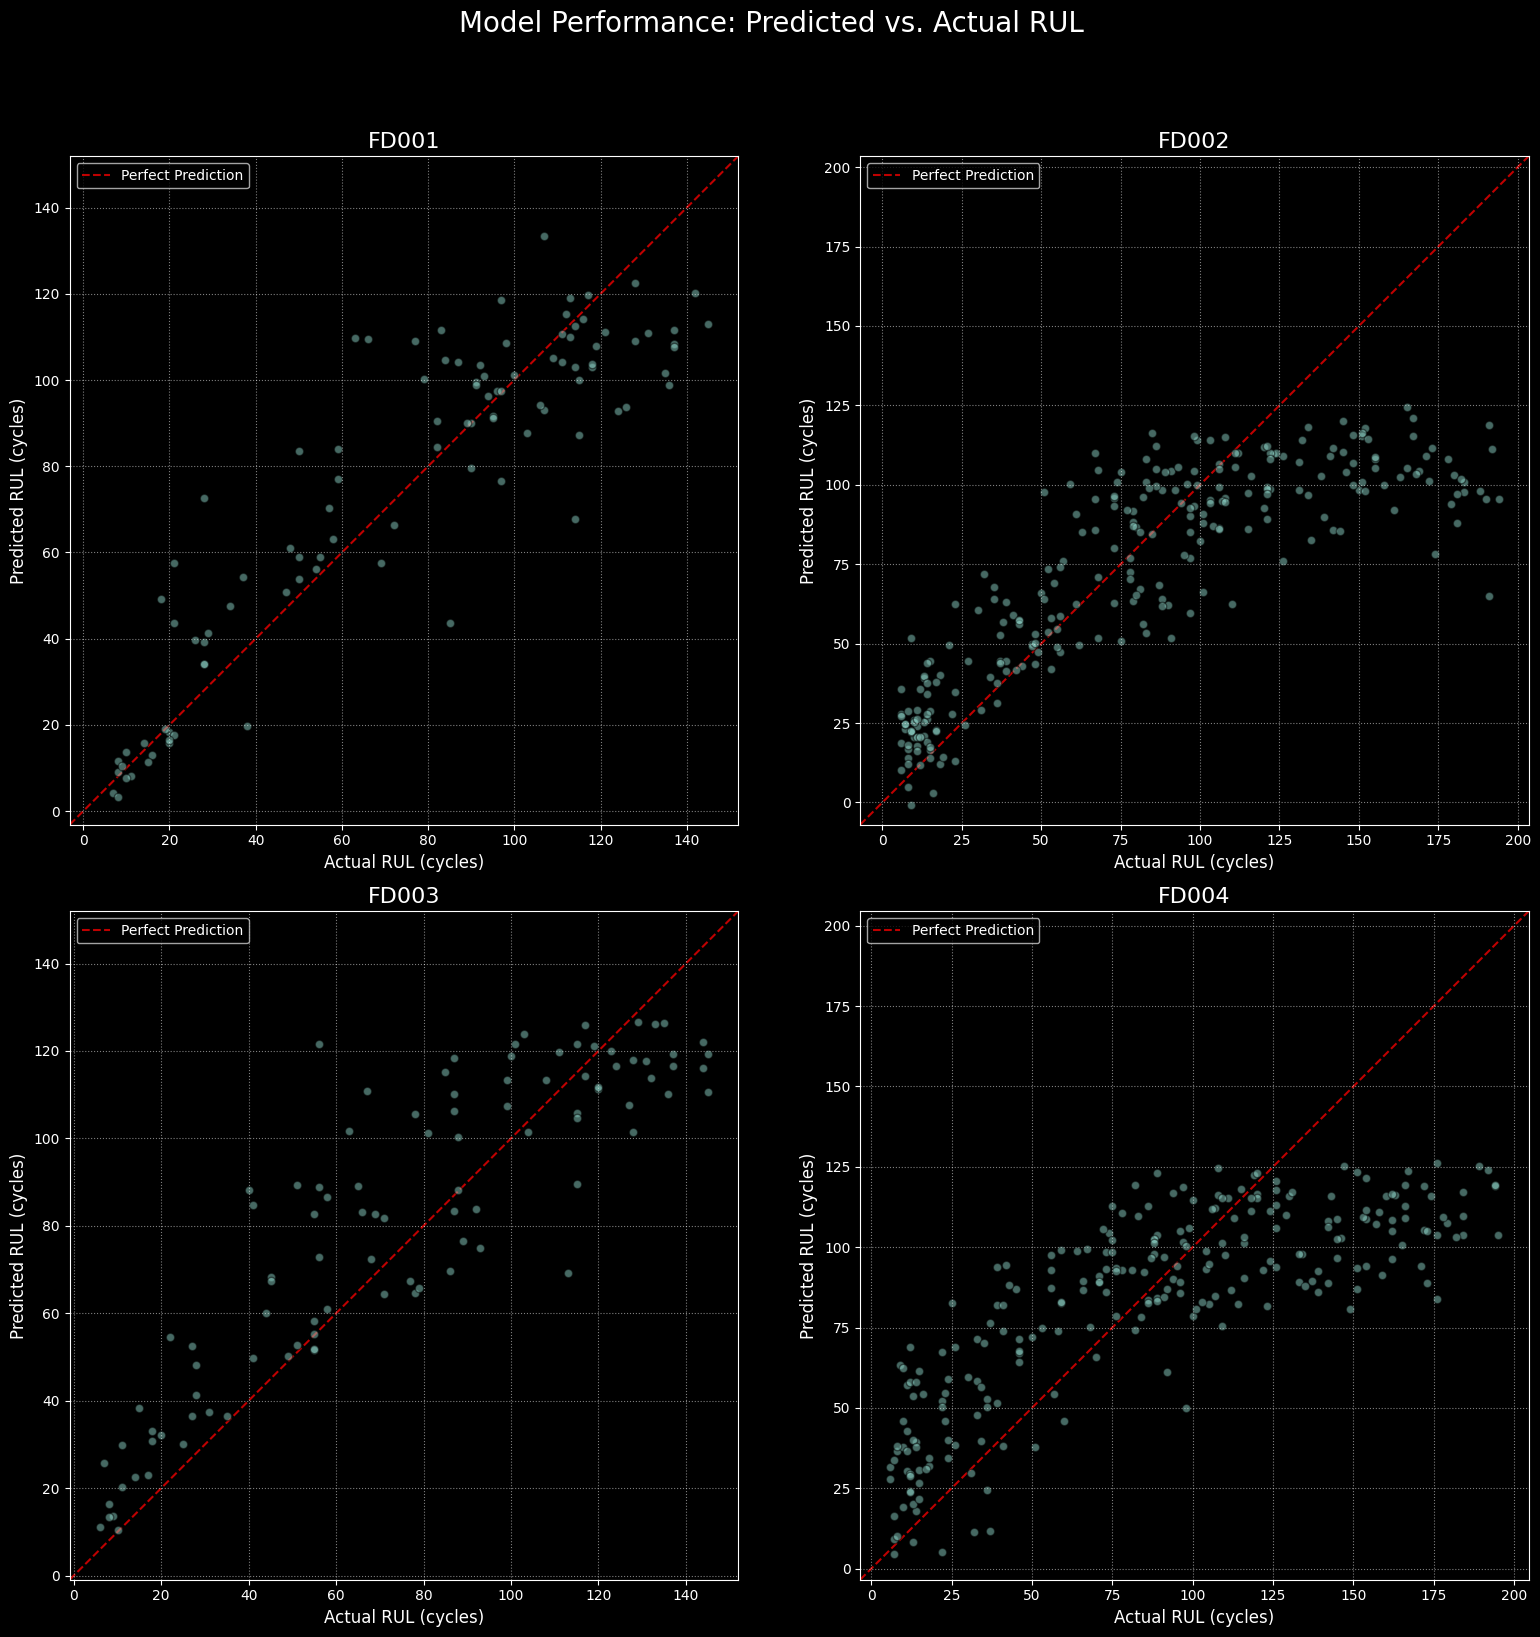

In [45]:
import matplotlib.pyplot as plt

try:
    if 'all_results' not in locals() or not all_results:
        print("Error: 'all_results' dictionary not found.")
        print("Please run the evaluation cell above this one first.")
    else:
        plt.style.use('dark_background')
        fig, axes = plt.subplots(2, 2, figsize=(16, 16))
        fig.suptitle('Model Performance: Predicted vs. Actual RUL', fontsize=20, y=1.02)
        
        axes_list = axes.flatten()
        
        for i, (dataset_name, data) in enumerate(all_results.items()):
            ax = axes_list[i]
            rul_true = data['rul_true']
            predictions = data['predictions']
            
            ax.scatter(rul_true, predictions, alpha=0.5, edgecolors='k')
            
            lims = [
                np.min([ax.get_xlim(), ax.get_ylim()]),
                np.max([ax.get_xlim(), ax.get_ylim()]),
            ]
            ax.plot(lims, lims, 'r--', alpha=0.75, zorder=0, label='Perfect Prediction')
            
            ax.set_aspect('equal', adjustable='box')
            ax.set_xlim(lims)
            ax.set_ylim(lims)
            
            ax.set_title(dataset_name, fontsize=16)
            ax.set_xlabel('Actual RUL (cycles)', fontsize=12)
            ax.set_ylabel('Predicted RUL (cycles)', fontsize=12)
            ax.legend()
            ax.grid(True, linestyle=':', alpha=0.5)

        plt.tight_layout(rect=[0, 0, 1, 0.98])
        plt.show()

except NameError as e:
    print(f"Error: A required variable is not defined: {e}")
except Exception as e:
    print(f"An error occurred during plotting: {e}")

In [53]:
import pickle
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

print("\n--- Saving Scalers for Streamlit App ---")

DATASET_CONFIG = {
    'FD001': {'static_cols': ['op_setting_3', 'sensor_1', 'sensor_10', 'sensor_18', 'sensor_19']},
    'FD002': {'static_cols': []},
    'FD003': {'static_cols': ['op_setting_3', 'sensor_1', 'sensor_18', 'sensor_19']},
    'FD004': {'static_cols': []}
}
column_names = ['engine_id', 'cycle'] + [f'op_setting_{i}' for i in range(1, 4)] + [f'sensor_{i}' for i in range(1, 22)]

for name, config in DATASET_CONFIG.items():
    try:
        df_train_raw = pd.read_csv(f'data/train_{name}.txt', sep='\\s+', header=None, names=column_names)
        
        feature_cols = [col for col in df_train_raw.columns if col not in ['engine_id', 'cycle'] and col not in config['static_cols']]
        
        scaler = MinMaxScaler()
        scaler.fit(df_train_raw[feature_cols])
        
        scaler_filename = f'scaler_{name}.pkl'
        with open(scaler_filename, 'wb') as f:
            pickle.dump(scaler, f)
        print(f" Saved {scaler_filename}")
        
    except Exception as e:
        print(f"Could not save scaler for {name}: {e}")


--- Saving Scalers for Streamlit App ---
 Saved scaler_FD001.pkl
 Saved scaler_FD002.pkl
 Saved scaler_FD003.pkl
 Saved scaler_FD004.pkl
